# M R Kuladeep

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading team data

In [5]:
data = pd.read_csv('Desktop\matches.csv')

# Data cleaning

In [6]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
data['team1']=data['team1'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
data['team2']=data['team2'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
data['winner']=data['winner'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

In [8]:
data=data.dropna(how='all')

In [9]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Most successful Teams

In [10]:
success = data['winner'].groupby(data['winner']).count()
success.index.name='winner'

In [11]:
s1=data['team1'].groupby(data['team1']).count()
s1.index.name='winner'
s1.columns= ['matches played']

In [12]:
s2=data['team2'].groupby(data['team2']).count()
s2.index.name='winner'
s2.columns= ['matches played']

In [13]:
s=pd.merge(s1,s2,on='winner')
s['matches played']=s['team1']+s['team2']
ss=s['matches played']

In [14]:
sr=pd.concat([ss,success],axis=1)
sr.columns=['matches played','wins']
sr['success rate']=round(sr['wins']*100/sr['matches played'],2)
sr.sort_values(by='wins',ascending=False)

,matches played,wins,success rate
winner,,,
Mumbai Indians,187,109,58.29
Chennai Super Kings,164,100,60.98
Kolkata Knight Riders,178,92,51.69
Royal Challengers Bangalore,180,84,46.67
Kings XI Punjab,176,82,46.59
Rajasthan Royals,147,75,51.02
Delhi Daredevils,161,67,41.61
Sunrisers Hyderabad,108,58,53.70
Deccan Chargers,75,29,38.67


# Visualization form

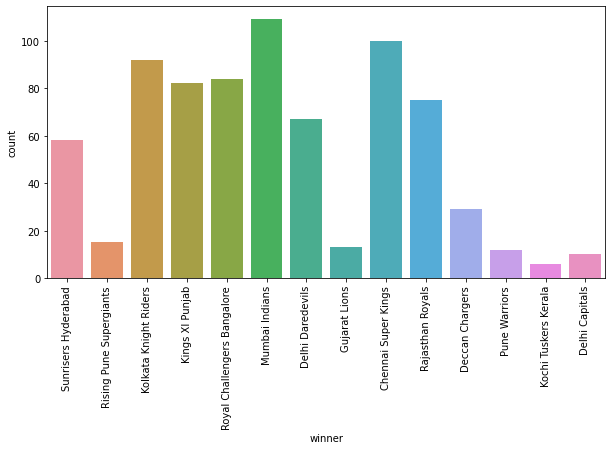

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='winner',data=data)
plt.xticks(rotation=90)
plt.show()

# Successful team in 2017

In [16]:
s17 = data[data['season']==2017]

In [17]:
s17.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
ss17=s17['winner'].groupby(s17['winner']).count()

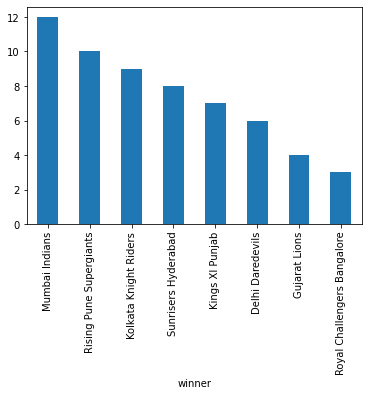

In [19]:
ss17.sort_values(ascending=False).plot.bar()

# Players with most man of the matches

In [20]:
M=data['player_of_match'].groupby(data['player_of_match']).count()

In [21]:
M.sort_values(ascending=False).head(10)

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

# Reading player data

In [22]:
dely = pd.read_csv('Desktop\deliveries.csv')

In [23]:
dely['batting_team']=dely['batting_team'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
dely['bowling_team']=dely['bowling_team'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

In [24]:
dely.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Top Run scorers

In [25]:
delys=dely.groupby(['batsman'])['match_id'].nunique()

In [26]:
delysort= dely['batsman_runs'].groupby(dely['batsman']).sum()

In [27]:
ds=pd.merge(delys,delysort,on='batsman')

In [28]:
dss=ds.sort_values(by='batsman_runs',ascending=False)

In [29]:
dss.columns = ['Matches','Runs']

In [30]:
dss.head(10)

,Matches,Runs
batsman,,
V Kohli,169,5434
SK Raina,189,5415
RG Sharma,182,4914
DA Warner,126,4741
S Dhawan,158,4632
CH Gayle,124,4560
MS Dhoni,170,4477
RV Uthappa,170,4446
AB de Villiers,142,4428


# Players with most no. of matches played

In [31]:
delm=dely['match_id'].groupby(dely['batsman']).nunique()

In [32]:
delm.sort_values(ascending=False).head(10)

batsman
SK Raina          189
RG Sharma         182
RV Uthappa        170
MS Dhoni          170
V Kohli           169
KD Karthik        162
S Dhawan          158
YK Pathan         153
G Gambhir         151
AB de Villiers    142
Name: match_id, dtype: int64

# Highest wicket takers

In [33]:
m2=dely.dropna()

In [34]:
m12=m2[m2['dismissal_kind']!= 'run out']

In [35]:
m123=m12['player_dismissed'].groupby(m12['bowler']).count()

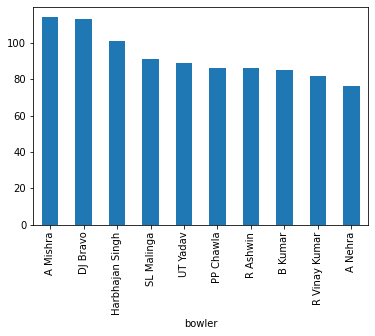

In [36]:
m123.sort_values(ascending=False).head(10).plot.bar()

# Most no. of stumpings

In [37]:
m1234=m12[m12['dismissal_kind']=='stumped']

In [38]:
kula=m1234['player_dismissed'].groupby(m1234['fielder']).count()

In [39]:
kula.sort_values(ascending=False).head(10)

fielder
MS Dhoni         38
RV Uthappa       32
KD Karthik       29
WP Saha          18
AC Gilchrist     16
PA Patel         16
NV Ojha          10
KC Sangakkara     9
RR Pant           9
Q de Kock         8
Name: player_dismissed, dtype: int64

# No. of matches played

In [40]:
data['id'].count()

756

# No. of times a team won when it didn't win the toss

In [41]:
d1=data[data['toss_winner']!=data['winner']]

In [42]:
d12=d1['winner'].groupby(d1['winner']).count()

In [43]:
d12.sort_values(ascending=False)

winner
Mumbai Indians                 53
Kings XI Punjab                47
Royal Challengers Bangalore    43
Chennai Super Kings            43
Kolkata Knight Riders          39
Sunrisers Hyderabad            35
Rajasthan Royals               33
Delhi Daredevils               32
Rising Pune Supergiants        12
Deccan Chargers                10
Pune Warriors                   9
Gujarat Lions                   3
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Name: winner, dtype: int64

# Most extra runs conceded by a bowler

In [44]:
delyy=dely['extra_runs'].groupby(dely['bowler']).sum()

In [45]:
delyy.sort_values(ascending=False).head(10)

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
SR Watson          171
DW Steyn           171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

# No of times the toss winner chose to field

In [46]:
d1=data[data['toss_decision']=='field']
d1['toss_decision'].count()

463

# No. of times the toss winner chose to field & won the match

In [47]:
d1[d1['toss_winner']==d1['winner']]['id'].count()

254

# No. of times toss winner chose to bat

In [48]:
d2=data[data['toss_decision']=='bat']

In [49]:
d2['toss_winner'].count()

293

# No. of times toss winner chose to bat and won the match

In [50]:
d2[d2['toss_winner']==d2['winner']]['id'].count()

134

# No. of big margin wins(30 runs) by a team batting first

In [51]:
dat1=data[data['win_by_runs']!=0]

In [52]:
dat12=dat1[dat1['win_by_runs']>=30]

In [53]:
dat123=dat12['win_by_runs'].groupby(dat12['winner']).count()

In [54]:
dat123.sort_values(ascending=False)

winner
Mumbai Indians                 24
Chennai Super Kings            22
Kolkata Knight Riders          15
Royal Challengers Bangalore    13
Rajasthan Royals               13
Delhi Daredevils               10
Kings XI Punjab                 9
Sunrisers Hyderabad             8
Deccan Chargers                 5
Rising Pune Supergiants         2
Delhi Capitals                  2
Pune Warriors                   1
Name: win_by_runs, dtype: int64

# No. of big margin wins ( >4 wickets) by a team bowling first

In [55]:
dat4=data[data['win_by_wickets']!=0]

In [56]:
dat45=dat4[dat4['win_by_wickets']>=4]

In [57]:
dat456=dat45['win_by_wickets'].groupby(dat45['winner']).count()

In [58]:
dat456.sort_values(ascending = False)

winner
Kolkata Knight Riders          52
Mumbai Indians                 48
Royal Challengers Bangalore    45
Chennai Super Kings            45
Kings XI Punjab                41
Delhi Daredevils               40
Rajasthan Royals               39
Sunrisers Hyderabad            25
Deccan Chargers                11
Gujarat Lions                  10
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  5
Kochi Tuskers Kerala            4
Name: win_by_wickets, dtype: int64

# Most no. of catches

In [59]:
m2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
199,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,4,KM Jadhav,TM Head,MC Henriques,0,...,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,Chennai Super Kings,Mumbai Indians,4,6,F du Plessis,SR Watson,KH Pandya,0,...,0,0,0,0,0,0,0,F du Plessis,stumped,Q de Kock
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,...,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock


In [60]:
m3=m2[m2['dismissal_kind']=='caught']

In [61]:
m4=m3.groupby(m3['fielder'])['fielder'].count()

In [62]:
m4.sort_values(ascending=False).head(10)

fielder
KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: fielder, dtype: int64

# Matches where dl was applied

In [63]:
data[data['dl_applied']!=0]['id'].count()

19

# Bowlers conceding most no balls & penalties

In [64]:
dely['exr']=dely['noball_runs']+dely['penalty_runs']

In [65]:
y1=dely['exr'].groupby(dely['bowler']).sum()

In [66]:
y1.sort_values(ascending=False).head(10)

bowler
S Sreesanth    27
SL Malinga     25
JJ Bumrah      23
I Sharma       21
A Mishra       20
UT Yadav       19
JA Morkel      18
AB Dinda       14
SW Tait        14
SR Watson      13
Name: exr, dtype: int64

# No. of matches where match is a tie & super over was played

In [67]:
dely[dely['is_super_over']!=0]['match_id'].nunique()

7

In [68]:
d10=dely[dely['dismissal_kind']=='run out']

In [69]:
d11= d10['fielder'].groupby(d10['fielder']).count()

# Most runouts

In [70]:
d11.sort_values(ascending=False).head(10)

fielder
MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
MK Pandey         14
AB de Villiers    14
KD Karthik        14
DJ Bravo          12
PA Patel          12
YK Pathan         10
Name: fielder, dtype: int64

# Best strike rate

In [71]:
d7=dely.groupby(dely['batsman'])['ball'].count()

In [72]:
d8=dely.groupby(dely['batsman'])['batsman_runs'].sum()

In [73]:
d9=pd.merge(d7,d8, on = 'batsman')

In [74]:
d9['strike_rate']=round(d9['batsman_runs']*100/d9['ball'],2)

In [75]:
d10=d9.sort_values(by='strike_rate',ascending=False)

# batsman playing <500 balls not to be considered in top strike rated players as it is not enough to judge

In [76]:
d10[d10['ball']>=500].head(10)

,ball,batsman_runs,strike_rate
batsman,,,
AD Russell,803,1445,179.95
RR Pant,1104,1792,162.32
GJ Maxwell,902,1403,155.54
HH Pandya,736,1118,151.90
JC Buttler,954,1431,150.00
V Sehwag,1833,2728,148.83
AB de Villiers,2977,4428,148.74
CH Gayle,3131,4560,145.64
KH Pandya,635,915,144.09


# Most economical bowlers ( per over )

In [77]:
e9=dely.groupby(dely['bowler'])['total_runs'].sum()

In [78]:
e10=dely.groupby(dely['bowler'])['ball'].count()

In [79]:
e11=pd.merge(e9,e10 , on='bowler')

In [80]:
e11['economy']=round(e11['total_runs']*6/e11['ball'],2)

In [81]:
e12=e11[e11['ball']>=72]
e12.columns = ['total_runs','no. of balls','economy']

In [82]:
e12.sort_values(by='economy',ascending=True).head(10)

,total_runs,no. of balls,economy
bowler,,,
Sohail Tanvir,275,265,6.23
A Chandila,245,234,6.28
FH Edwards,160,150,6.40
L Ngidi,175,163,6.44
SMSM Senanayake,211,195,6.49
J Yadav,248,226,6.58
SM Pollock,307,280,6.58
LH Ferguson,96,87,6.62
A Kumble,1089,983,6.65


# Most no. of sixes

In [83]:
dely1=dely[dely['batsman_runs']==6]

In [84]:
dely12=dely1.groupby(dely1['batsman'])['batsman_runs'].count()

In [85]:
dely12.sort_values(ascending=False).head(10)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

# Best Average

In [86]:
f1=dely.groupby(dely['batsman'])['match_id'].nunique()

In [87]:
f2=dely.groupby(dely['batsman'])['batsman_runs'].sum()

In [88]:
f3=pd.merge(f1,f2,on='batsman')

In [89]:
f3['average']=round(f3['batsman_runs']/f3['match_id'],2)

In [90]:
f4=f3.sort_values(by='average',ascending=False)

In [91]:
f4.columns = ['no. of matches','total runs','average']

In [92]:
f4[f4['no. of matches']>=20].head(10)

,no. of matches,total runs,average
batsman,,,
DA Warner,126,4741,37.63
LMP Simmons,29,1079,37.21
CH Gayle,124,4560,36.77
SE Marsh,69,2489,36.07
KL Rahul,58,2013,34.71
ML Hayden,32,1107,34.59
MEK Hussey,58,1977,34.09
RR Pant,54,1792,33.19
KS Williamson,41,1319,32.17


# Caught & bowled

In [93]:
d=dely[dely['bowler']==dely['fielder']]

In [94]:
d1=d[d['dismissal_kind']!='run out']

In [95]:
d11=d1.groupby(d1['bowler'])['bowler'].count()
d11.sort_values(ascending=False).head()

bowler
S Gopal           5
Kuldeep Yadav     5
Imran Tahir       3
RA Jadeja         2
Sandeep Sharma    2
Name: bowler, dtype: int64

# Average score of a team in an innings

In [96]:
av=dely.groupby(dely['batting_team'])['match_id'].nunique()
av1=dely.groupby(dely['batting_team'])['total_runs'].sum()
a=pd.merge(av,av1,on='batting_team')
a.index.name='Team'

In [97]:
a['Avg score']=round(a['total_runs']/a['match_id'],0)
a.columns=['Matches','Runs','Avg score']

In [98]:
a.sort_values(by='Avg score',ascending=False)[['Matches','Avg score']]

,Matches,Avg score
Team,,
Delhi Capitals,16,164.0
Gujarat Lions,30,162.0
Chennai Super Kings,164,161.0
Mumbai Indians,187,159.0
Kings XI Punjab,176,158.0
Sunrisers Hyderabad,108,158.0
Royal Challengers Bangalore,180,156.0
Kolkata Knight Riders,178,154.0
Rajasthan Royals,146,154.0


# Print only final match results

In [99]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [100]:
for i in range(min(data['season']),max(data['season'])+1):
 print(data[data['season']==i].tail(1))

      id  season    city        date                team1             team2  \
116  117    2008  Mumbai  2008-06-01  Chennai Super Kings  Rajasthan Royals   

          toss_winner toss_decision  result  dl_applied            winner  \
116  Rajasthan Royals         field  normal           0  Rajasthan Royals   

     win_by_runs  win_by_wickets player_of_match                       venue  \
116            0               3       YK Pathan  Dr DY Patil Sports Academy   

       umpire1      umpire2 umpire3  
116  BF Bowden  RE Koertzen     NaN  
      id  season          city        date            team1  \
173  174    2009  Johannesburg  2009-05-24  Deccan Chargers   

                           team2                  toss_winner toss_decision  \
173  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied           winner  win_by_runs  win_by_wickets  \
173  normal           0  Deccan Chargers            6               0   

    player_of_ma

In [101]:
l=pd.DataFrame(m12.groupby(['batsman','bowler'])['bowler'].count())
l.columns=['wickets']

In [102]:
l

wickets
batsman        bowler                
A Ashish Reddy A Nehra              1
               BW Hilfenhaus        1
               DJ Bravo             1
               KA Pollard           1
               MM Patel             1
...                               ...
Z Khan         AB Dinda             1
               DE Bollinger         1
               GB Hogg              1
               JW Hastings          1
               KV Sharma            1

[4786 rows x 1 columns]

In [103]:
l['max']=l.groupby(['batsman'])['wickets'].max()

In [105]:
rg=dely[dely['batsman']=='RG Sharma']

In [106]:
rg

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,exr
275,2,1,Mumbai Indians,Rising Pune Supergiants,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
276,2,1,Mumbai Indians,Rising Pune Supergiants,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0
278,2,1,Mumbai Indians,Rising Pune Supergiants,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0
279,2,1,Mumbai Indians,Rising Pune Supergiants,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0
285,2,1,Mumbai Indians,Rising Pune Supergiants,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178853,11415,1,Mumbai Indians,Chennai Super Kings,4,5,RG Sharma,Q de Kock,Harbhajan Singh,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
178854,11415,1,Mumbai Indians,Chennai Super Kings,4,6,RG Sharma,Q de Kock,Harbhajan Singh,0,...,0,0,0,4,0,4,NaN,NaN,NaN,0
178856,11415,1,Mumbai Indians,Chennai Super Kings,5,2,RG Sharma,Q de Kock,SN Thakur,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0
178862,11415,1,Mumbai Indians,Chennai Super Kings,6,1,RG Sharma,AS Yadav,DL Chahar,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0


In [109]:
rgs=rg[rg['player_dismissed']=='RG Sharma']

In [112]:
s=rgs.groupby(['batsman','bowler'])['player_dismissed'].count()

In [115]:
pd.DataFrame(s.sort_values(ascending=False).head(10))

player_dismissed
batsman   bowler                         
RG Sharma R Vinay Kumar                 6
          A Mishra                      6
          SP Narine                     6
          SK Trivedi                    5
          DJ Bravo                      5
          UT Yadav                      4
          DS Kulkarni                   4
          JD Unadkat                    3
          JA Morkel                     3
          JP Faulkner                   3

In [125]:
sixes=rg[rg['batsman_runs']==6]

In [127]:
six=sixes.groupby(['batsman','bowler'])['batsman_runs'].count()

In [129]:
pd.DataFrame(six.sort_values(ascending=False)).head(10)

batsman_runs
batsman   bowler                    
RG Sharma M Morkel                 6
          UT Yadav                 6
          PP Chawla                6
          DT Christian             6
          R Bhatia                 6
          VR Aaron                 5
          AB Dinda                 5
          A Kumble                 4
          DS Kulkarni              4
          DJ Hussey                3

In [137]:
pd.DataFrame((rg.groupby(['batsman','bowler'])['batsman_runs'].sum()).sort_values(ascending=False).head(15))

batsman_runs
batsman   bowler                       
RG Sharma PP Chawla                 146
          UT Yadav                  145
          SP Narine                 122
          M Morkel                  119
          R Bhatia                  100
          DJ Bravo                   84
          JH Kallis                  82
          SR Watson                  82
          Shakib Al Hasan            82
          P Kumar                    81
          AD Russell                 81
          A Mishra                   80
          Imran Tahir                79
          R Ashwin                   77
          RA Jadeja                  71